In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV
bike_trip_data_path = 'Resources/trip.csv'
bike_trips_df = pd.read_csv(bike_trip_data_path, low_memory=False)

bike_trips_df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [3]:
#  Get the names of the columns.
bike_trips_df.columns

Index(['stoptime', 'bikeid', 'tripduration', 'from_station_name',
       'to_station_name', 'from_station_id', 'to_station_id', 'usertype',
       'gender', 'birthyear'],
      dtype='object')

In [4]:
# Check for null or NaNs.
bike_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 10 columns):
stoptime             286858 non-null object
bikeid               286858 non-null object
tripduration         286858 non-null float64
from_station_name    286858 non-null object
to_station_name      286858 non-null object
from_station_id      286858 non-null object
to_station_id        286858 non-null object
usertype             286858 non-null object
gender               181558 non-null object
birthyear            181554 non-null object
dtypes: float64(1), object(9)
memory usage: 21.9+ MB


In [5]:
# Create a clean DataFrame after dropping the null values.
clean_bike_trips_df = bike_trips_df.dropna()
clean_bike_trips_df.head(5)

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [6]:
# Split up the data into groups based upon 'gender' and 'stoptime'
# And, find out how many bike trips each gender took.
gender_stoptime = clean_bike_trips_df.groupby(["gender", "stoptime"]).count()['tripduration']

gender_stoptime

gender    stoptime       
Female    1/1/2015 11:01     2
          1/1/2015 11:54     2
          1/1/2015 12:22     2
          1/1/2015 13:16     4
          1/1/2015 13:32     2
          1/1/2015 14:46     2
          1/1/2015 15:25     2
          1/1/2015 15:27     2
          1/1/2015 15:57     2
          1/1/2015 15:58     2
          1/1/2015 16:13     2
          1/1/2015 16:47     2
          1/1/2015 16:55     2
          1/1/2015 17:21     2
          1/1/2015 17:50     2
          1/1/2015 18:11     2
          1/1/2016 10:02     1
          1/1/2016 10:06     1
          1/1/2016 11:51     1
          1/1/2016 12:12     1
          1/1/2016 14:55     1
          1/1/2016 17:34     1
          1/1/2016 1:20      1
          1/1/2016 20:02     1
          1/10/2015 10:24    2
          1/10/2015 12:31    2
          1/10/2015 13:19    2
          1/10/2015 13:55    2
          1/10/2015 13:56    2
          1/10/2015 13:58    2
                            ..
Other     9/6

In [7]:
# Reset the index of the Pandas Series to convert to a DataFrame.

gender_stoptime = gender_stoptime.reset_index()
gender_stoptime.head(10)

,gender,stoptime,tripduration
0,Female,1/1/2015 11:01,2
1,Female,1/1/2015 11:54,2
2,Female,1/1/2015 12:22,2
3,Female,1/1/2015 13:16,4
4,Female,1/1/2015 13:32,2
5,Female,1/1/2015 14:46,2
6,Female,1/1/2015 15:25,2
7,Female,1/1/2015 15:27,2
8,Female,1/1/2015 15:57,2
9,Female,1/1/2015 15:58,2


In [8]:
# Get the datatypes for the DataFrame columns.
gender_stoptime.dtypes

gender          object
stoptime        object
tripduration     int64
dtype: object

In [9]:
#  Change the 'stoptime' column to a datetime object.
gender_stoptime['stoptime']= pd.to_datetime(gender_stoptime['stoptime'])

In [10]:
# Check the datatypes for each column.
gender_stoptime.dtypes

gender                  object
stoptime        datetime64[ns]
tripduration             int64
dtype: object

In [11]:
# Check the DataFrame.
gender_stoptime.head()

,gender,stoptime,tripduration
0,Female,2015-01-01 11:01:00,2
1,Female,2015-01-01 11:54:00,2
2,Female,2015-01-01 12:22:00,2
3,Female,2015-01-01 13:16:00,4
4,Female,2015-01-01 13:32:00,2


In [12]:
# Create a pivot table with the 'stoptime' as the index and the columns ='gender' with the trip counts in each row.
gender_stoptime_pivot = gender_stoptime.pivot(index="stoptime", columns="gender", values="tripduration")
gender_stoptime_pivot.head(10)

gender,Female,Male,Other,stoptime
stoptime,,,,
2014-10-13 10:47:00,NaN,2.0,NaN,NaN
2014-10-13 10:48:00,4.0,4.0,NaN,NaN
2014-10-13 10:49:00,NaN,2.0,NaN,NaN
2014-10-13 11:45:00,4.0,6.0,NaN,NaN
2014-10-13 11:47:00,2.0,12.0,NaN,NaN
2014-10-13 11:49:00,2.0,2.0,NaN,NaN
2014-10-13 11:51:00,6.0,12.0,NaN,NaN
2014-10-13 11:52:00,2.0,NaN,NaN,NaN
2014-10-13 11:55:00,NaN,4.0,NaN,NaN


In [13]:
#  Drop the stoptime column.
gender_stoptime_pivot.drop('stoptime', axis=1, inplace=True)
gender_stoptime_pivot

gender,Female,Male,Other
stoptime,,,
2014-10-13 10:47:00,NaN,2.0,NaN
2014-10-13 10:48:00,4.0,4.0,NaN
2014-10-13 10:49:00,NaN,2.0,NaN
2014-10-13 11:45:00,4.0,6.0,NaN
2014-10-13 11:47:00,2.0,12.0,NaN
2014-10-13 11:49:00,2.0,2.0,NaN
2014-10-13 11:51:00,6.0,12.0,NaN
2014-10-13 11:52:00,2.0,NaN,NaN
2014-10-13 11:55:00,NaN,4.0,NaN


In [14]:
# Create a new DataFrame from the pivot table DataFrame by filtering for the given dates, '2015-01-01':'2015-12-31'. 
tripcounts_Jan_Dec = gender_stoptime_pivot.loc['2015-01-01':'2015-12-31']
tripcounts_Jan_Dec

gender,Female,Male,Other
stoptime,,,
2015-01-01 00:44:00,NaN,2.0,NaN
2015-01-01 00:48:00,NaN,2.0,NaN
2015-01-01 03:18:00,NaN,2.0,NaN
2015-01-01 08:20:00,NaN,2.0,NaN
2015-01-01 11:01:00,2.0,NaN,NaN
2015-01-01 11:03:00,NaN,2.0,NaN
2015-01-01 11:54:00,2.0,NaN,NaN
2015-01-01 11:55:00,NaN,2.0,NaN
2015-01-01 12:22:00,2.0,2.0,NaN


In [15]:
# Resample the DataFrame by the week. ie., "W", and get the trip counts for each week. 
weekly_rides_df = tripcounts_Jan_Dec.resample('W').count()
weekly_rides_df.head(10)

gender,Female,Male,Other
stoptime,,,
2015-01-04,68,206,5
2015-01-11,247,944,5
2015-01-18,226,963,11
2015-01-25,313,992,17
2015-02-01,294,1036,23
2015-02-08,199,783,8
2015-02-15,281,1104,24
2015-02-22,252,923,31
2015-03-01,234,886,27


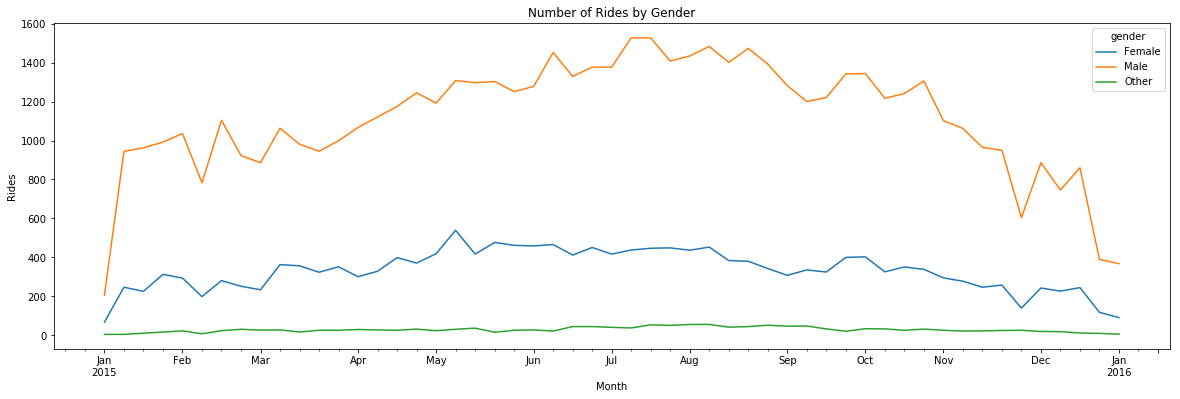

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot the resampled DataFrame.

weekly_rides = weekly_rides_df.plot(figsize = (20,6))
# Add a title 
weekly_rides.set_title("Number of Rides by Gender")
#  Add a x- and y-axis label.
weekly_rides.set_xlabel("Month")
weekly_rides.set_ylabel("Rides")

plt.show()
plt.tight_layout()